In [1]:
import pandas as pd
import numpy as np
# from google.colab import files

In [2]:
#defining bias and input values
BIT_WIDTH = int(8)
num_inputs = 4           
is_signed = True           #1= signed || 0= unsigned
is_sigmoid_signed = 1   #1= signed || 0= unsigned
weights_on_memory = 1   #1: on memory || 0: weights = inputs

n_integer = 0 # 'm' binary digits are the integer part
n_mantissa = BIT_WIDTH - n_integer    # 'n' binary digits are the fractional part of `x`;
n_mantissa_sigmoid = n_mantissa #+ 3 #número de casas decimais sigmoide memória

download_files = 0      #1= para baixar || 0= não baixar
memory_address_type = True               # 0= int(n) ; 1= float(address)|| indice da memoria int ou float


In [3]:
# atenuacao_rescale = 0.95
atenuacao_rescale = 1
sigmoid_range = 2                    #tamanho eixo x, sigmoide antes tratamento
range_tb_df = (2**n_integer)              #tamanho do dataframe do tb
mult_factor = 1                     # expande sigmoide


In [4]:
n_integer

0

In [5]:
n_mantissa

8

In [6]:
2**(n_integer-1)

0.5

In [7]:
range_tb_df = (2**n_integer)              #tamanho do dataframe do tb
#DX SIGMOID
is_signed = True           #1= signed || 0= unsigned
if is_signed:
  unsigned_offset = 0
  offset_df_memory = 0
  # norm_y = (2**(n_integer-1))                   # normalização em y: 256(8bits)
  norm_y = 1
  dx_sigmoid_final = 1/(2**(n_mantissa_sigmoid-1))     #dx da sigmoid na memória -> depende das casas .fixo com adicional para resolução de dx_input
  
else:
  unsigned_offset = int((2**n_integer)/2)  # 128
  offset_df_memory = unsigned_offset - ((sigmoid_range/2)*mult_factor)
  norm_y = (2**(n_integer))                   # normalização em y: 256(8bits)
  dx_sigmoid_final = 1/(2**(n_mantissa_sigmoid))     #dx da sigmoid na memória -> depende das casas .fixo com adicional para resolução de dx_input


dx_sigmoid = dx_sigmoid_final/mult_factor   #dx necessário antes da expansão

if (dx_sigmoid == 1):
  total_dx = range_tb_df+1
else:
  
  total_dx = (1/dx_sigmoid)*sigmoid_range +1



In [8]:
sigmoid_dx_list = np.linspace(-(sigmoid_range/2),(sigmoid_range/2),int(total_dx)) #vai de -128 a 127, dividido em 256 pontos (8 bits)


In [9]:
range_tb_df

1

In [10]:
sigmoid_range

2

In [11]:
# range_tb_df
sigmoid_dx_list = np.linspace(-(sigmoid_range/2),(sigmoid_range/2),int(total_dx)) #vai de -128 a 127, dividido em 256 pontos (8 bits)
# sigmoid_dx_list

In [12]:
# df_sigmoid = pd.DataFrame((range(-int(range_tb_df/2),int(range_tb_df/2)+1,1))) #start, end, step
df_sigmoid = pd.DataFrame(np.linspace(-(sigmoid_range/2),(sigmoid_range/2),int(total_dx))) #start, end, step
df_sigmoid.columns = ['n'] # INPUTS_df
# df_sigmoid['dx'] = sigmoid_dx_list
df_sigmoid = df_sigmoid*atenuacao_rescale
df_sigmoid.head()

,n
0,-1.000000
1,-0.992188
2,-0.984375
3,-0.976562
4,-0.968750


In [13]:
import math
exp = math.exp

In [14]:
# ((1/(1+(exp(-1*(testes_x1))))).astype(float)).tolist()
# df[0].apply(lambda x: float(x))
sigmoide_rescale = (8/(sigmoid_range/2))*0.8
multiplied_list = [(1/(1+(exp(-1*(element*sigmoide_rescale))))) for element in sigmoid_dx_list]
# multiplied_list
df_sigmoid['sigmoid']= multiplied_list
df_sigmoid.head()
# df_sigmoid

,n,sigmoid
0,-1.000000,0.001659
1,-0.992188,0.001744
2,-0.984375,0.001833
3,-0.976562,0.001927
4,-0.968750,0.002025


In [15]:
unsigned_offset

0

## Sigmoid expansion (change 'x' rescale)

In [16]:
# n_re_scale = (df_sigmoid['n'])*mult_factor
n_re_scale = (df_sigmoid['n'])*mult_factor
n_re_scale

0     -1.000000
1     -0.992188
2     -0.984375
3     -0.976562
4     -0.968750
         ...   
252    0.968750
253    0.976562
254    0.984375
255    0.992188
256    1.000000
Name: n, Length: 257, dtype: float64

In [17]:
# df_sigmoid['n'] = (df_sigmoid['n'] + (unsigned_offset/2))*mult_factor
df_sigmoid['n'] = n_re_scale

df_sigmoid['n_zeros'] = (df_sigmoid['n'] + dx_sigmoid) #zeros para serem salvos na memória

In [18]:
df_sigmoid

,n,sigmoid,n_zeros
0,-1.000000,0.001659,-0.992188
1,-0.992188,0.001744,-0.984375
2,-0.984375,0.001833,-0.976562
3,-0.976562,0.001927,-0.968750
4,-0.968750,0.002025,-0.960938
...,...,...,...
252,0.968750,0.997975,0.976562
253,0.976562,0.998073,0.984375
254,0.984375,0.998167,0.992188
255,0.992188,0.998256,1.000000


<Axes: >

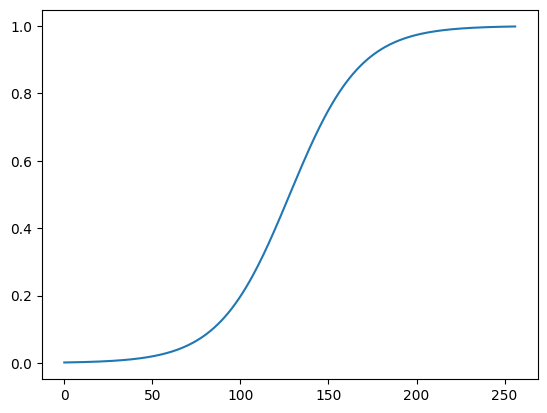

In [19]:
import matplotlib.pyplot as plt
# plt.close("all")
# (pd.Series(sigmoid_dx)).plot()
(pd.Series(multiplied_list)).plot()

In [20]:
df_sigmoid['sig_norm']= df_sigmoid['sigmoid']*norm_y
df_sigmoid

,n,sigmoid,n_zeros,sig_norm
0,-1.000000,0.001659,-0.992188,0.001659
1,-0.992188,0.001744,-0.984375,0.001744
2,-0.984375,0.001833,-0.976562,0.001833
3,-0.976562,0.001927,-0.968750,0.001927
4,-0.968750,0.002025,-0.960938,0.002025
...,...,...,...,...
252,0.968750,0.997975,0.976562,0.997975
253,0.976562,0.998073,0.984375,0.998073
254,0.984375,0.998167,0.992188,0.998167
255,0.992188,0.998256,1.000000,0.998256


## df_sigmoid_bin

In [21]:
# PEGAR FUNÇÕES FXP_MATH PARA CONVERSÃO FLOAT BIN

In [22]:
# # AJUSTANTO DATAFRAME CONFORME LIMITES DE REPRESENTAÇÃO
# df_MV.loc[df_MV.X > upper_limit, 'X'] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
# df_MV.loc[df_MV.X < low_limit, 'X'] = low_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior

# df_MV.loc[df_MV.Y > upper_limit, 'Y'] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
# df_MV.loc[df_MV.Y < low_limit, 'Y'] = low_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
# df_MV

In [23]:
df_sigmoid

,n,sigmoid,n_zeros,sig_norm
0,-1.000000,0.001659,-0.992188,0.001659
1,-0.992188,0.001744,-0.984375,0.001744
2,-0.984375,0.001833,-0.976562,0.001833
3,-0.976562,0.001927,-0.968750,0.001927
4,-0.968750,0.002025,-0.960938,0.002025
...,...,...,...,...
252,0.968750,0.997975,0.976562,0.997975
253,0.976562,0.998073,0.984375,0.998073
254,0.984375,0.998167,0.992188,0.998167
255,0.992188,0.998256,1.000000,0.998256


In [48]:
n_mantissa

8

In [60]:
from fxpmath import Fxp
#SIGMOID MEMORY
df_sigmoid_bin = pd.DataFrame()

#verification
df_sigmoid_bin['address'] = (df_sigmoid['n']) *(2**(BIT_WIDTH - 1))
df_sigmoid_bin['sigmoid'] = (df_sigmoid['sig_norm']) *(2**(BIT_WIDTH - 1))
n_mantissa_sigmoid = BIT_WIDTH-1
df_sigmoid_bin['address_bin'] = (df_sigmoid['n'].apply(lambda x:  Fxp(x, signed=is_signed, n_word= BIT_WIDTH, n_frac= n_mantissa).bin() ) )
df_sigmoid_bin['address_zeros'] = (df_sigmoid['n_zeros'].apply(lambda x:  Fxp(x, signed=is_signed, n_word= BIT_WIDTH, n_frac= n_mantissa).bin() ) )
df_sigmoid_bin['sigmoid_bin'] = (df_sigmoid['sig_norm'].apply(lambda x:  Fxp(x, signed=is_signed, n_word= BIT_WIDTH, n_frac= n_mantissa_sigmoid).bin() ) )
# df_sigmoid_bin['sigmoid_bin'] = (df_sigmoid['sig_norm'].apply(lambda x:  Fxp(x, signed=is_signed, n_word= BIT_WIDTH, n_frac= 0).bin() ) )

# scale_ = 1/(2**BIT_WIDTH)
# df_sigmoid_bin['address_bin'] = (df_sigmoid['n'].apply(lambda x:  Fxp(x, signed=is_signed, n_word= BIT_WIDTH, n_frac= 0, scale=scale_).bin() ) )
# df_sigmoid_bin['address_zeros'] = (df_sigmoid['n_zeros'].apply(lambda x:  Fxp(x, signed=is_signed, n_word= BIT_WIDTH, n_frac= 0, scale=scale_).bin() ) )
# df_sigmoid_bin['sigmoid_bin'] = (df_sigmoid['sig_norm'].apply(lambda x:  Fxp(x, signed=is_signed, n_word= BIT_WIDTH, n_frac= 0, scale=scale_).bin() ) )

# AJUSTANTO DATAFRAME CONFORME LIMITES DE REPRESENTAÇÃO
# upper_limit = (2**(n_integer-1)) - (2**-n_mantissa)
# low_limit = -(2**(n_integer-1))
upper_limit = (sigmoid_range/2 - (1/2**(BIT_WIDTH-1))) * (2**(BIT_WIDTH-1))
low_limit = -(sigmoid_range/2) * (2**(BIT_WIDTH-1))
print(upper_limit,low_limit)

df_sigmoid_bin['sigmoid'].loc[df_sigmoid_bin['sigmoid'] > upper_limit] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior
df_sigmoid_bin['address'].loc[df_sigmoid_bin['address'] > upper_limit] = upper_limit # substituindo valores maiores que o limite superior, pelo próprio limite superior

address_bin_converted = df_sigmoid_bin['address_bin'].apply(lambda x:  Fxp(f"0b{x}", signed=is_signed, n_word= BIT_WIDTH, n_frac= 0).astype(float) ) 
df_sigmoid_bin['address_bin_conv'] = address_bin_converted
df_sigmoid_bin['sigmoid_bin_conv'] = df_sigmoid_bin['sigmoid_bin'].apply(lambda x:  Fxp(f"0b{x}", signed=is_signed, n_word= BIT_WIDTH, n_frac= 0).astype(float) ) 

df_sigmoid_bin.drop(df_sigmoid_bin.tail(1).index,inplace=True) # drop last n rows
df_sigmoid_bin

127.0 -128.0


C:\Users\luisa\AppData\Local\Temp\ipykernel_4288\4154163444.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\luisa\AppData\Local\Temp\ipykernel_4288\4154163444.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,address,sigmoid,address_bin,address_zeros,sigmoid_bin,address_bin_conv,sigmoid_bin_conv
0,-128.0,0.212327,10000000,10000000,00000000,-128.0,0.0
1,-127.0,0.223194,10000000,10000000,00000000,-128.0,0.0
2,-126.0,0.234616,10000000,10000000,00000000,-128.0,0.0
3,-125.0,0.246622,10000000,10000000,00000000,-128.0,0.0
4,-124.0,0.259241,10000000,10000000,00000000,-128.0,0.0
...,...,...,...,...,...,...,...
251,123.0,127.000000,01111111,01111111,01111111,127.0,127.0
252,124.0,127.000000,01111111,01111111,01111111,127.0,127.0
253,125.0,127.000000,01111111,01111111,01111111,127.0,127.0
254,126.0,127.000000,01111111,01111111,01111111,127.0,127.0


In [29]:
#conferir quantas linhas de endereço duplicadas tem
len(df_sigmoid_bin['address_bin'])-len(df_sigmoid_bin['address_bin'].drop_duplicates())

128

In [30]:
len(df_sigmoid_bin['address_bin'])

257

In [31]:
duplicated_addr_bin = pd.DataFrame(df_sigmoid_bin['address_bin'].duplicated())

In [32]:
duplicated_addr_bin.head()

,address_bin
0,False
1,True
2,True
3,True
4,True


In [33]:
duplicated_addr_bin = duplicated_addr_bin[duplicated_addr_bin['address_bin'] == True]  # df will have only rows with True in c3

## Substitui máximos df_Sigmoid

In [34]:
# zeros_aux = str(np.zeros(n_integer+n_mantissa_sigmoid-1))
# zeros_aux= zeros_aux.replace(".", "");
# zeros_aux= zeros_aux.replace("[", "");
# zeros_aux= zeros_aux.replace("]", "");
# zeros_aux= zeros_aux.replace(" ", "");

# ones_aux = str(np.ones(n_integer+n_mantissa_sigmoid-1))
# ones_aux= ones_aux.replace(".", "");
# ones_aux= ones_aux.replace("[", "");
# ones_aux= ones_aux.replace("]", "");
# ones_aux= ones_aux.replace(" ", "");

In [65]:
# ##------------CORREÇÃO DE MÁXIMOS e MÍNIMOS BINÁRIOS------------##

# #Substituindo erros de conversão float -> bin_2complement
# #valores acima de valor x, estavam sendo convertidos com por ex, 100 sendo que
# #o máximo seria 011 (apenas exemplo)

# #--------------Address--------------# (signed)
# df_sigmoid_bin['address_bin'].iloc[int(len(df_sigmoid_bin)/2):].replace(
#     to_replace=['1' + zeros_aux],
#     value='0' + ones_aux,
# inplace=True)

# if (is_sigmoid_signed == 0):

#   #--------------Sigmoid--------------# (unsigned)
#   df_sigmoid_bin['sigmoid_bin'].replace(to_replace=['10' + zeros_aux],
#       value= '1' + ones_aux,
#   inplace=True)

# #============================================================================#
# else:

#     #--------------Sigmoid--------------# (signed)
#   df_sigmoid_bin['sigmoid_bin'].replace(to_replace=['1' + zeros_aux],
#       value= '0' + ones_aux,
#   inplace=True)

# df_sigmoid_bin

# Graphs

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py

In [73]:
x_axis = df_sigmoid_bin['address']
y_axis = df_sigmoid_bin['sigmoid_bin_conv']
pacitydef = 0.8

sigmoid = go.Scatter(
    x= x_axis,
    y=df_sigmoid_bin['sigmoid'],
    name="sigmoid",
    # line= dict(color='#FF8000'),
    opacity = 0.8,
    line_shape='spline')

sigmoid_bin = go.Scatter(
    x= x_axis,
    y= y_axis,
    name="sigmoid_bin",
    line= dict(color='#FF8000'),
    opacity = 0.8,
    line_shape='spline')

dadospred = ([sigmoid,sigmoid_bin])
figpred = go.Figure(data=dadospred)#, layout=layout)
py.iplot(figpred)

In [268]:
#colocando na memória com o Index
df_sigmoid_first= float(df_sigmoid['n'].iloc[:1])
i= 0
text = str('')
text_zeros = str('')
text_rom_to_asic = str('--"bin_address" => "bin_data",- address(MAC_result) || f(x) \n') # -1 a 1
#texto para fazer lógica 'signed' funcionar no std_logic_vector
text_rom_to_asic_2 = str('--"bin_data",--(address)MAC     =integer_MAC|| f(x)               = integer_f_x \n')# 0 a 1 e -1 a 0

#------------------------------- ROM ASIC -------------------------------#
#texto rom -> vhd (asic) || índice por 'n'
for i in range(int(len(df_sigmoid_bin)/2), len(df_sigmoid_bin)): 
    text_rom_to_asic_2 = (
        text_rom_to_asic_2+'"' 
             +str(df_sigmoid_bin['sigmoid_bin'][i])+  '",-- '
             +f"({(df_sigmoid_bin['address_bin'][i])})"
             + str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor)).ljust(10, ' ')
             +f" = {str(df_sigmoid_bin['address_bin_conv'][i]).ljust(6, ' ')}"
             +f" || {str(df_sigmoid['sig_norm'][i]).ljust(18, ' ')} = {str(df_sigmoid_bin['sigmoid_bin_conv'][i])}\n")

for i in range(0, int(len(df_sigmoid_bin)/2) ): 
    text_rom_to_asic_2 = (
        text_rom_to_asic_2+'"' #pega o q já tem de texto
             +str(df_sigmoid_bin['sigmoid_bin'][i])+  '",-- ' #pega elemento i da sigmoide
             +f"({df_sigmoid_bin['address_bin'][i]})"
             + str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor)).ljust(10, ' ')
             +f" = {str(df_sigmoid_bin['address_bin_conv'][i]).ljust(6, ' ')}"
             +f" || {str(df_sigmoid['sig_norm'][i]).ljust(18, ' ')} = {str(df_sigmoid_bin['sigmoid_bin_conv'][i])}\n")
    

#------------------------------- ROM .mif -------------------------------#
#define se o endereço será com 'n' ou 'address'
if (memory_address_type == False): # 0= int(n)
  for i in range(0, len(df_sigmoid_bin)): #caso seja por 'n'
    text = (text+''+ str(df_sigmoid_bin.index[i]) + ':' + str(df_sigmoid_bin['sigmoid_bin'][i])+  ';-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
    # )
else: #1= float(address)
  for i in range(0, len(df_sigmoid_bin)):
    text = (text+''+ str(df_sigmoid_bin['address_bin'][i]) + ':' +str(df_sigmoid_bin['sigmoid_bin'][i])+  ';-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
   
   #essa não funciona pra compilar 
   # text_rom_to_asic = (text_rom_to_asic+'"'+ str(df_sigmoid_bin['address_bin'][i]) + '" => "' +str(df_sigmoid_bin['sigmoid_bin'][i])+  '";-- '+str(offset_df_memory +df_sigmoid_first+(i*dx_sigmoid*mult_factor))+' || '+str(df_sigmoid['sig_norm'][i]) +'\n')
    # )
    # text_zeros = (text_zeros+''+ str(df_sigmoid_bin['address_zeros'][i]) + ':' +zeros_memory+  ';-- '+str(df_sigmoid['n_zeros'][i])+' || zero \n')

## ROM Definitions

In [269]:
rom_clk = 0   #1= rom com clock || 0= sem clock

# ROM_name = "rom_fx_addwidth"+str(memory_depth)+"_addbit"+str(int(math.log2(memory_depth)))+"_datawidth"+str(memory_width)
ROM_name = f"ROM_fixedpoint_{BIT_WIDTH}bit"


In [270]:
memory_width= n_integer + n_mantissa_sigmoid
if memory_address_type == False : # 0= int(n)
  memory_depth = len(df_sigmoid_bin)
  memory_value_type = 'DEC' #Enter BIN, DEC, HEX, OCT, or UNS; #because memory is with (signed/unsigned) bin address
else: #1= float(address)
  memory_depth = len(df_sigmoid_bin)
  memory_value_type = 'BIN' #Enter BIN, DEC, HEX, OCT, or UNS; #because memory is with (signed/unsigned) bin address

memory_depth

256

In [271]:
if rom_clk:
	rom_text_asic = ( 
f'''--https://stackoverflow.com/questions/17579716/implementing-rom-in-xilinx-vhdl
LIBRARY ieee ;
USE ieee.std_logic_1164.all ;
use ieee.numeric_std.all;

----------------

entity {ROM_name} is
generic(addr_width : integer := {str(memory_depth)}; -- store {str(memory_depth)} elements
        addr_bits  : integer := {str(int(math.log2(memory_depth)))}; -- required bits to store {str(memory_depth)} elements
        data_width : integer := {str(memory_width)}  -- each element has {str(memory_width)}-bits
				);
			
port ( clk : in std_logic ;
		address : in std_logic_vector(addr_bits-1 downto 0);
		data_out : out std_logic_vector(data_width-1 downto 0)
		) ;
end entity ;

------------------
architecture arch of {ROM_name} is

	signal reg_address: std_logic_vector(addr_bits-1 downto 0);
	type memory is array ( 0 to addr_width-1 ) of std_logic_vector(data_width-1 downto 0 ) ;
	constant myrom : memory := (
	
{text_rom_to_asic_2}
	
--	2 => "11111111" , --255
--	3 => "11010101" ,  
others => "00000000000" 
) ;

begin 
	process(clk)
		begin 
		if( clk'event and clk = '1' ) then
			reg_address <= address ;
		end if ;
	end process ;
---------------
data_out <= myrom(to_integer(unsigned(reg_address))) ;
end architecture ;

''')

else:
	rom_text_asic = ( f'''

--https://stackoverflow.com/questions/17579716/implementing-rom-in-xilinx-vhdl
LIBRARY ieee ;
USE ieee.std_logic_1164.all ;
use ieee.numeric_std.all;

----------------

ENTITY {ROM_name} is
generic(addr_width : integer := {str(memory_depth)}; -- store {str(memory_depth)} elements
				addr_bits  : integer := {str(int(math.log2(memory_depth)))}; -- required bits to store {str(memory_depth)} elements
				data_width : integer := {str(memory_width)}  -- each element has {str(memory_width)}-bits
				);
			
  PORT (
    address : IN STD_LOGIC_VECTOR(addr_bits - 1 DOWNTO 0);
    data_out : OUT STD_LOGIC_VECTOR(data_width - 1 DOWNTO 0)
  );
END ENTITY;

------------------
architecture arch of {ROM_name} is

	type memory is array ( 0 to addr_width-1 ) of std_logic_vector(data_width-1 downto 0 ) ;
	constant myrom : memory := (
	
{text_rom_to_asic_2}
	
--	2 => "11111111" , --255
--	3 => "11010101" ,  
others => "00000000000" 
) ;

begin 
---------------
data_out <= myrom(to_integer(unsigned(address))) ;
end architecture ;

''')


print(rom_text_asic)



--https://stackoverflow.com/questions/17579716/implementing-rom-in-xilinx-vhdl
LIBRARY ieee ;
USE ieee.std_logic_1164.all ;
use ieee.numeric_std.all;

----------------

ENTITY ROM_fixedpoint_8bit is
generic(addr_width : integer := 256; -- store 256 elements
				addr_bits  : integer := 8; -- required bits to store 256 elements
				data_width : integer := 7  -- each element has 7-bits
				);
			
  PORT (
    address : IN STD_LOGIC_VECTOR(addr_bits - 1 DOWNTO 0);
    data_out : OUT STD_LOGIC_VECTOR(data_width - 1 DOWNTO 0)
  );
END ENTITY;

------------------
architecture arch of ROM_fixedpoint_8bit is

	type memory is array ( 0 to addr_width-1 ) of std_logic_vector(data_width-1 downto 0 ) ;
	constant myrom : memory := (
	
--"bin_data",--(address)MAC     =integer_MAC|| f(x)               = integer_f_x 
"01000000",-- (00000000)0.0        = 0.0    || 0.5                = 64.0
"01000001",-- (00000010)0.0078125  = 2.0    || 0.5124973964842103 = 65.0
"01000011",-- (00000100)0.015625   = 4.0 

In [272]:
text_file = open(f"{ROM_name}.vhd", "w")
text_file.write(rom_text_asic)
text_file.close()